<a href="https://colab.research.google.com/github/yioqse/Testeo1/blob/main/FiltrosBordes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ejemplos de deteccion de bordes en una imagen

In [4]:
!pip install opencv-python matplotlib

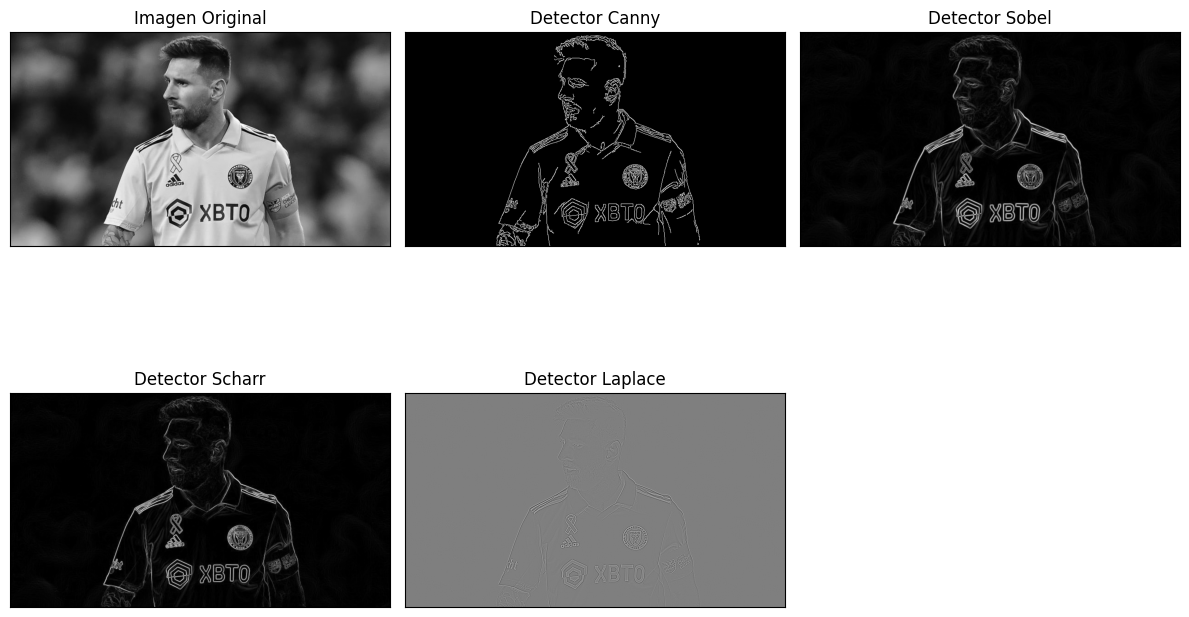

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen
# Puedes reemplazar 'ruta/a/tu/imagen.jpg' con la ruta a tu propia imagen
# Si no tienes una imagen, puedes descargar una de ejemplo o usar una de las que vienen con OpenCV
try:
    image = cv2.imread('messi5.jpg', cv2.IMREAD_GRAYSCALE) # Cargar en escala de grises para simplificar

    if image is None:
        # Si la imagen no se encuentra localmente, intentar descargar una de ejemplo
        print("Imagen no encontrada localmente. Descargando una imagen de ejemplo...")
        import requests
        image_url = "https://upload.wikimedia.org/wikipedia/commons/b/b4/Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg"
        response = requests.get(image_url)
        with open("messi5.jpg", "wb") as f:
            f.write(response.content)
        image = cv2.imread('messi5.jpg', cv2.IMREAD_GRAYSCALE)
        if image is None:
            print("Error al descargar o cargar la imagen de ejemplo.")
            raise FileNotFoundError("No se pudo cargar la imagen.")


    # Aplicar detector de bordes Canny
    canny_edges = cv2.Canny(image, 100, 200) # Los umbrales pueden ajustarse

    # Aplicar detector de bordes Sobel en X y Y y combinarlos
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_edges = np.sqrt(sobelx**2 + sobely**2)

    # Aplicar detector de bordes Scharr en X y Y y combinarlos
    scharrx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    scharry = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    scharr_edges = np.sqrt(scharrx**2 + scharry**2)

    # Aplicar detector de bordes Laplace
    laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)

    # Mostrar los resultados
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray')
    plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 3, 2), plt.imshow(canny_edges, cmap='gray')
    plt.title('Detector Canny'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 3, 3), plt.imshow(sobel_edges, cmap='gray')
    plt.title('Detector Sobel'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 3, 4), plt.imshow(scharr_edges, cmap='gray')
    plt.title('Detector Scharr'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 3, 5), plt.imshow(laplacian_edges, cmap='gray')
    plt.title('Detector Laplace'), plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}. Asegúrate de que la ruta de la imagen es correcta o que tienes conexión a internet para descargar la imagen de ejemplo.")
except Exception as e:
    print(f"Ocurrió un error: {e}")